# Session 3 - More image processing

In [22]:
import os
# adding python path
import sys
sys.path.append("..")
# openCV
import cv2
# numpy
import numpy as np
# class util functions
from utils.imutils import jimshow as show
from utils.imutils import jimshow_channel as show_channel
# plotting
import matplotlib.pyplot as plt

In [23]:
filepath = os.path.join("..", "..", "..", "cds-vis-data", "data", "img", "trex.png")

In [24]:
image = cv2.imread(filepath)

In [25]:
image.shape

(228, 350, 3)

## Grayscale histogram

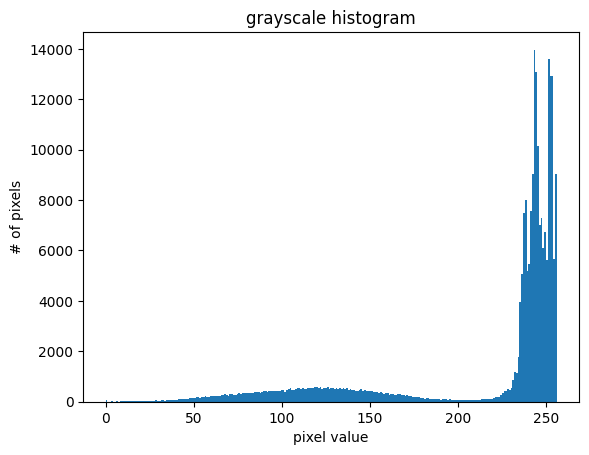

In [26]:
# converting to tgrayscale
grayed_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# create my canvas
plt.figure()
# add my histogram
plt.hist(image.flatten(), 255, [0,256])
# add title
plt.title("grayscale histogram")
plt.xlabel("pixel value")
plt.ylabel("# of pixels")
# show
plt.show()

In [27]:
# the 0 sets it to the blue channel, see calchist for more
hist = cv2.calcHist([image], [0], None, [255], [0,256])

In [28]:
hist.shape

(255, 1)

In [29]:
hist

array([[2.400e+01],
       [0.000e+00],
       [3.000e+00],
       [5.000e+00],
       [1.000e+00],
       [4.000e+00],
       [4.000e+00],
       [4.000e+00],
       [6.000e+00],
       [1.000e+01],
       [7.000e+00],
       [1.300e+01],
       [1.100e+01],
       [8.000e+00],
       [1.100e+01],
       [8.000e+00],
       [1.000e+01],
       [6.000e+00],
       [8.000e+00],
       [9.000e+00],
       [1.400e+01],
       [1.600e+01],
       [1.500e+01],
       [1.600e+01],
       [1.900e+01],
       [2.000e+01],
       [2.000e+01],
       [2.100e+01],
       [3.500e+01],
       [2.200e+01],
       [2.600e+01],
       [3.200e+01],
       [3.200e+01],
       [2.600e+01],
       [2.300e+01],
       [3.300e+01],
       [4.300e+01],
       [4.200e+01],
       [3.000e+01],
       [4.000e+01],
       [3.400e+01],
       [5.600e+01],
       [5.500e+01],
       [5.100e+01],
       [4.800e+01],
       [5.300e+01],
       [5.200e+01],
       [6.400e+01],
       [7.400e+01],
       [7.900e+01],


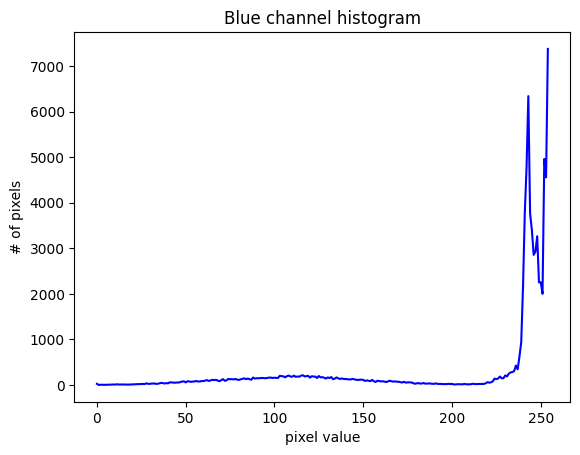

In [30]:
# create my canvas
plt.figure()
# add my histogram
plt.plot(hist, color="blue")
# add title
plt.title("Blue channel histogram")
plt.xlabel("pixel value")
plt.ylabel("# of pixels")
# show
plt.show()

In [31]:
# making red and green color channel histograms

# the 0 sets it to the blue channel, see calchist for more
histgreen = cv2.calcHist([image], [1], None, [255], [0,256])

# the 0 sets it to the blue channel, see calchist for more
histred = cv2.calcHist([image], [2], None, [255], [0,256])

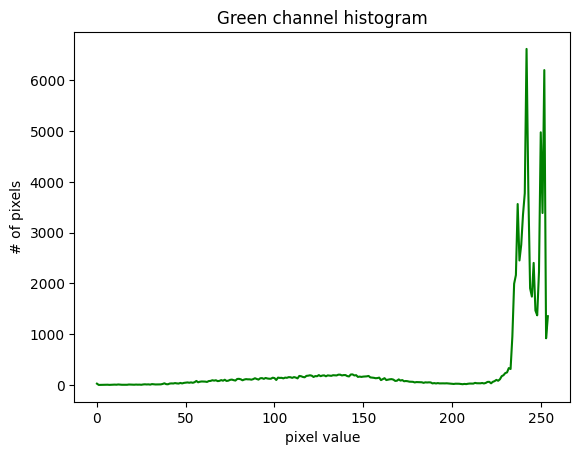

In [32]:
#green

# create my canvas
plt.figure()
# add my histogram
plt.plot(histgreen, color="green")
# add title
plt.title("Green channel histogram")
plt.xlabel("pixel value")
plt.ylabel("# of pixels")
# show
plt.show()

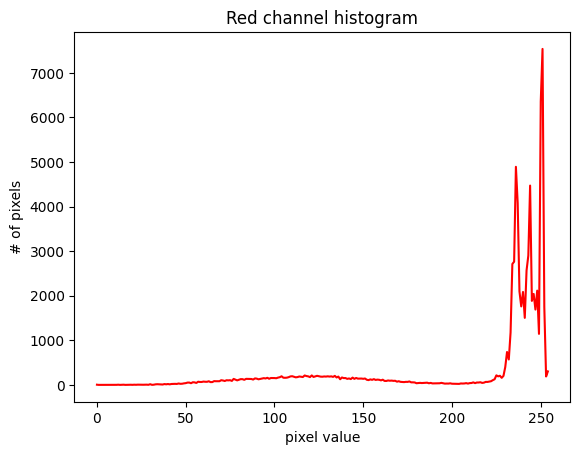

In [33]:
#red

# create my canvas
plt.figure()
# add my histogram
plt.plot(histred, color="red")
# add title
plt.title("Red channel histogram")
plt.xlabel("pixel value")
plt.ylabel("# of pixels")
# show
plt.show()

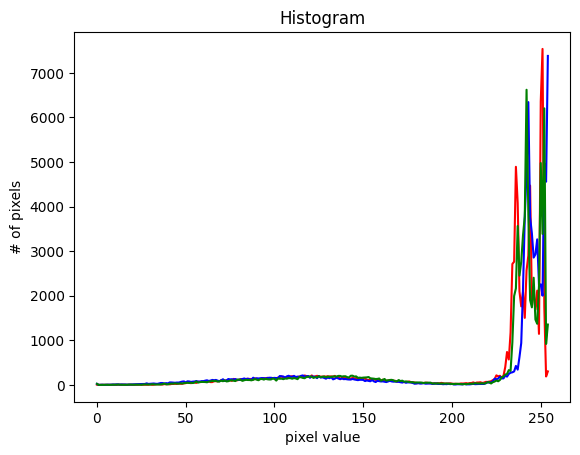

In [34]:
#all together

# create my canvas
plt.figure()
# add my histogram
plt.plot(histred, color="red")
plt.plot(hist, color="blue")
plt.plot(histgreen, color="green")
# add title
plt.title("Histogram")
plt.xlabel("pixel value")
plt.ylabel("# of pixels")
# show
plt.show()

In [35]:
# use cv2.split()
# takes an image and produces a tuple of the color channels
BLUE, GREEN, RED = cv2.split(image)

In [36]:
histblue = cv2.calcHist([BLUE], [0], None, [255], [0,256])

<function matplotlib.pyplot.show(close=None, block=None)>

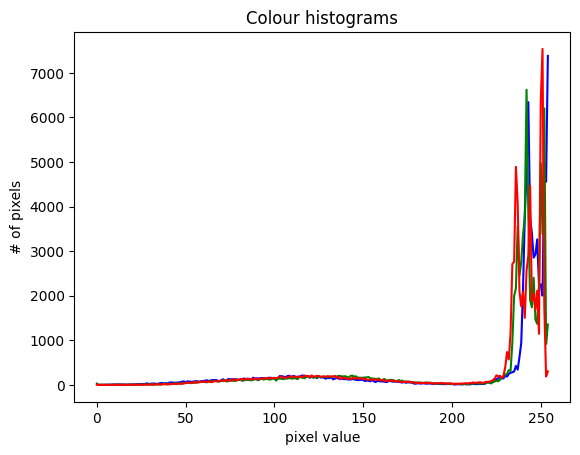

In [37]:
# create tuples
channels = cv2.split(image)
# create colour tuple
colors = ("blue", "green", "red")
# create canvas
plt.figure()
# title
plt.title("Colour histograms")
# name on x and y axis
plt.xlabel("pixel value")
plt.ylabel("# of pixels")

# initialize counter, usually called i
i = 0
for channel in channels:
    # histogram of values for single channel
    hist = cv2.calcHist([channel], [0], None, [255], [0,256])
    # get plot order
    line_color = colors[i]
    # plot histogram
    plt.plot(hist, color=line_color)
    # update counter
    i += 1

plt.show

# Comparing histograms

In [38]:
filepath_1 = os.path.join("..", "cds-visual", "data", "img", "trex.png")
filepath_2 = os.path.join("..", "cds-visual", "data", "img", "t-rex2.png")
filepath_3 = os.path.join("..", "cds-visual", "data", "img", "wave.png")

In [39]:
image_1 = cv2.imread(filepath_1)
image_2 = cv2.imread(filepath_2)
image_3 = cv2.imread(filepath_3)

In [40]:
hist_1 = cv2.calcHist([image_1], [0,1,2], None, [255,255,255], [0,256, 0,256, 0,256])
hist_2 = cv2.calcHist([image_2], [0,1,2], None, [255,255,255], [0,256, 0,256, 0,256])
hist_3 = cv2.calcHist([image_3], [0,1,2], None, [255,255,255], [0,256, 0,256, 0,256])

In [41]:
normalized_hist_1 = cv2.normalize(hist_1, hist_1, 0, 1.0, cv2.NORM_MINMAX)
normalized_hist_2 = cv2.normalize(hist_2, hist_2, 0, 1.0, cv2.NORM_MINMAX)
normalized_hist_3 = cv2.normalize(hist_3, hist_3, 0, 1.0, cv2.NORM_MINMAX)

In [42]:
normalized_hist_1

array([[[0.00082048, 0.        , 0.0001641 , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [43]:
# this number shows the distance between two histograms, the closer the distance, the lower the value, the more similar they are
# doesn't tell us much on its own, but can be compared to other distance numbers to see which histograms are relatively more similar
# the image order matters!
round(cv2.compareHist(normalized_hist_1, normalized_hist_2, cv2.HISTCMP_CHISQR), 2)

33.76

In [44]:
round(cv2.compareHist(normalized_hist_3, normalized_hist_2, cv2.HISTCMP_CHISQR), 2)

588.11

In [45]:
round(cv2.compareHist(normalized_hist_1, normalized_hist_3, cv2.HISTCMP_CHISQR), 2)

100.04

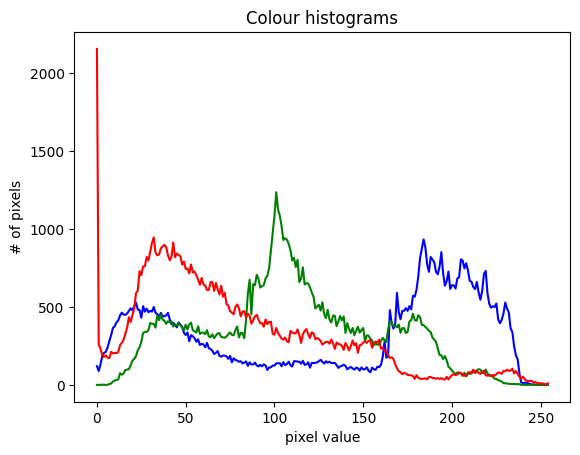

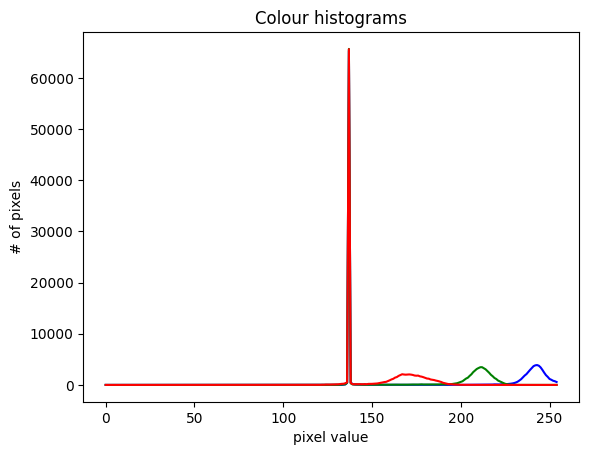

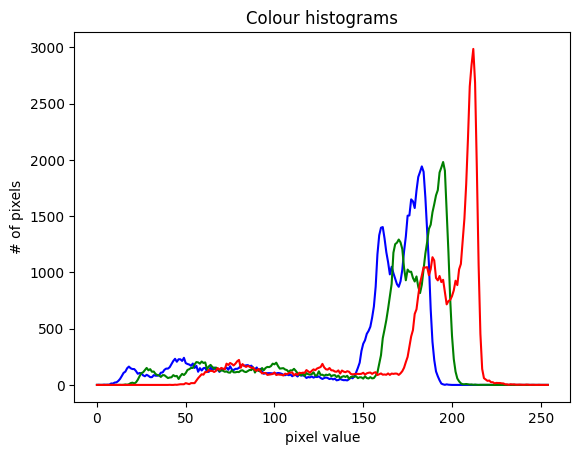

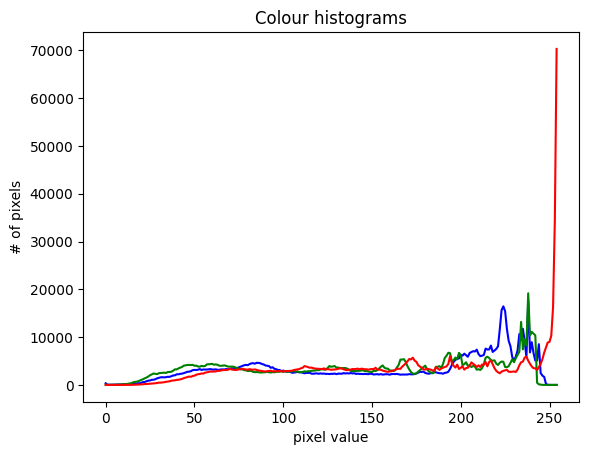

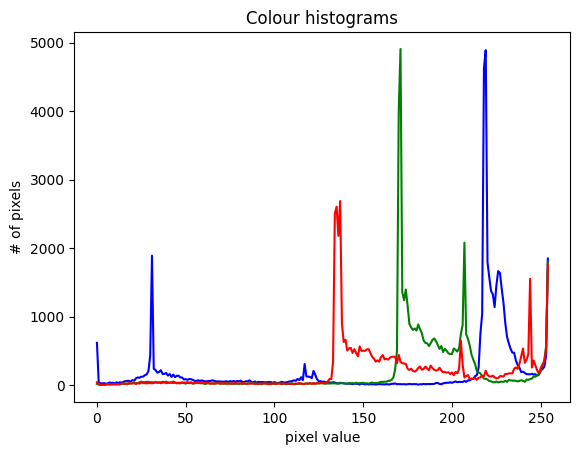

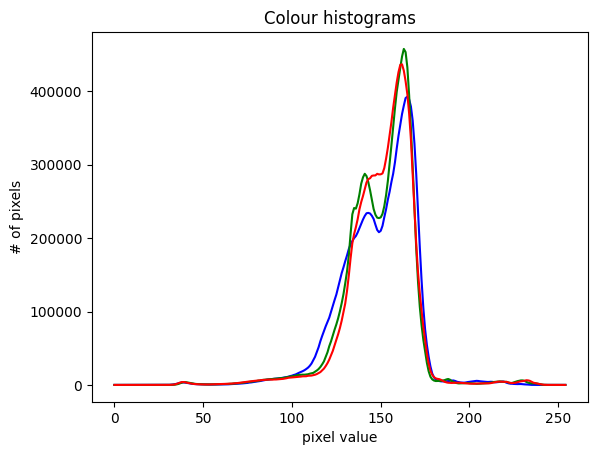

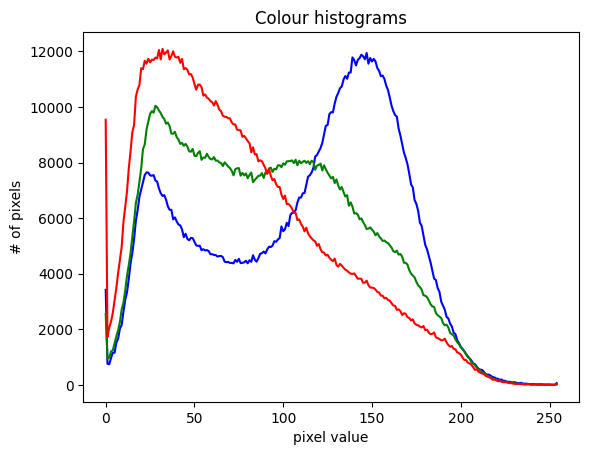

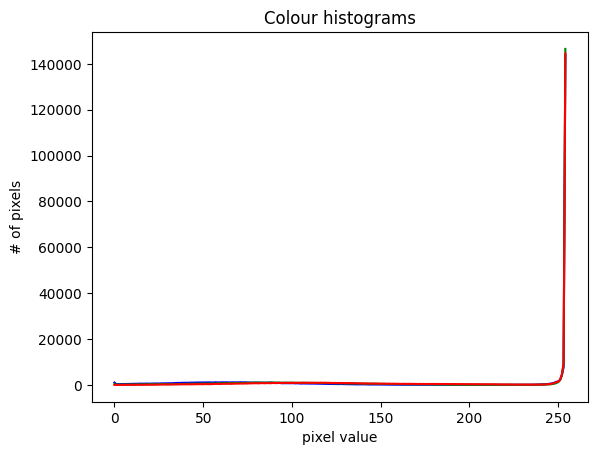

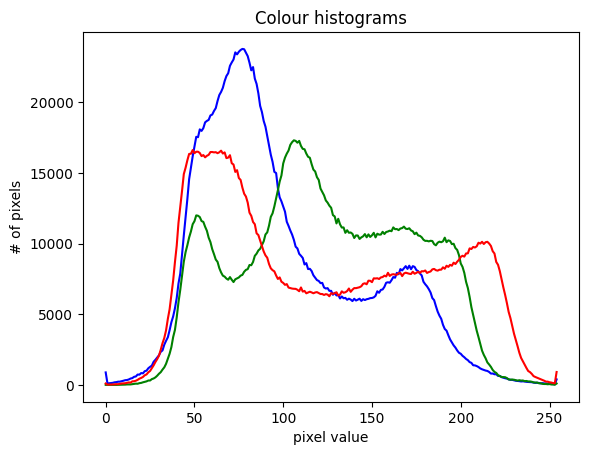

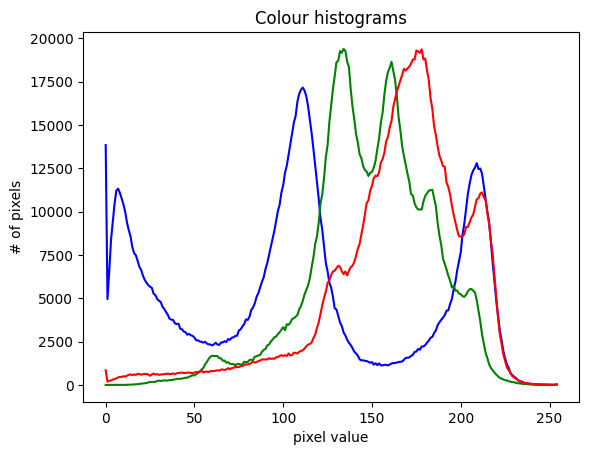

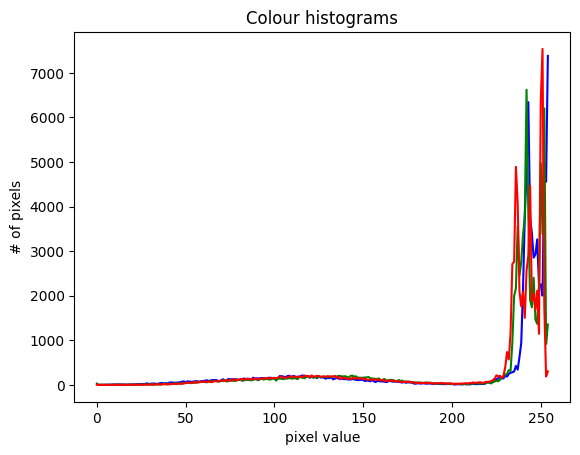

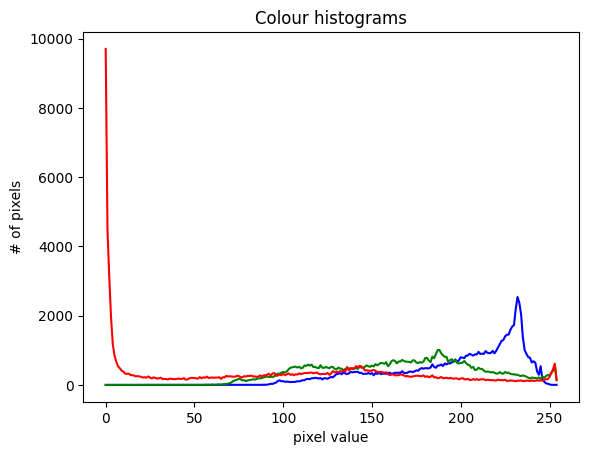

In [59]:
# function to make histograms for every file
datapath = os.path.join("..","cds-visual","data","img")
dirs = sorted(os.listdir(datapath))
outpath = os.path.join("..", "output")

for files in dirs:
    filepath = datapath + "/" + files
    # create tuples
    image = cv2.imread(filepath)
    channels = cv2.split(image)
    # create colour tuple
    colors = ("blue", "green", "red")
    # create canvas
    plt.figure()
    # title
    plt.title("Colour histograms")
    # name on x and y axis
    plt.xlabel("pixel value")
    plt.ylabel("# of pixels")

    # initialize counter, usually called i
    i = 0
    for channel in channels:
        # histogram of values for single channel
        hist = cv2.calcHist([channel], [0], None, [255], [0,256])
        # get plot order
        line_color = colors[i]
        # plot histogram
        plt.plot(hist, color=line_color)
        # update counter
        i += 1
    
    plt.savefig(outpath+"/"+"histogram of "+files)
    plt.show
    

# Exercise
In the shared drive cds-vis-data, you'll find a directory comprising 1360 different images of flowers. Many of these are different images of the same flower.

In groups, do the following activity:

Pick a random flower from the dataset, load it, and normalize it
Compare that image's colour histogram to every other flower in the dataset
Print save the filename of the 5 closest images, along with the distance score you calculated
Hint: use pandas
Qualitatively inspect the images - how does your algorithm perform?
Rewrite your code as a function which takes any input filename from a user and produces the new results showing top 5 closest images for the chosen image
This in-class exercise is going to be Assignment 1 for Visual Analytics, designing a simple image search algorithm. The Github classroom repo for this Assignment will go online later.

In [62]:
filepath = os.path.join("..", "..", "..", "cds-vis-data", "flowers", "image_1080.jpg")

In [63]:
image_flower = cv2.imread(filepath)

In [64]:
hist_flower = cv2.calcHist([image_flower], [0,1,2], None, [255,255,255], [0,256, 0,256, 0,256])

In [65]:
normalized_hist_flower = cv2.normalize(hist_flower, hist_flower, 0, 1.0, cv2.NORM_MINMAX)

In [69]:
# function to make normalized histograms for every file
datapath_data = os.path.join("..", "..", "..", "cds-vis-data", "flowers")
filelist_data = sorted(os.listdir(datapath_data))
outpath = os.path.join("..", "output")

for files in filelist_data:
    filepath_data = datapath_data + "/" + files
    image_data = cv2.imread(filepath_data)
    hist_data = cv2.calcHist([image_data], [0,1,2], None, [255,255,255], [0,256, 0,256, 0,256])
    normalized_hist_data = cv2.normalize(hist_data, hist_data, 0, 1.0, cv2.NORM_MINMAX)
    round(cv2.compareHist(normalized_hist_flower, normalized_hist_data, cv2.HISTCMP_CHISQR), 2)

KeyboardInterrupt: 